# Associative Dynamics in a Chaotic Neural Network
## M. Adachi, K. Aihara
*Neural Networks **10**, 1, 8348 (1997)*

$$
x_i(t+1) = f[\eta_i(t+1)+\zeta_i(t+1)]
$$

$$
\eta_i(t+1)=\sum \limits_j^N w_{ij}x_j(t)+k_f \eta_i(t)
$$

$$
\zeta_i(t+1)=k_r \zeta_i(t) - \alpha x_i(t) + a_i
$$

- $k_f$ - decay of feedback
- $k_r$ - decay of refract.
- $\alpha$ - refractory scaling

Uczymy za pomocą reguły Hebba:
$$
w_{ij} = \frac{1}{P} \sum \limits_p^P x_i^{(p)} x_j^{(p)}
$$

Obserwujemy przekrycie (overlap) ze wzorcem $p$:
$$
\mu_p = \frac{1}{N} \sum \limits_i^N x_i^{(p)}(2x_i-1)
$$

In [1]:
using Plots
default(leg=false)

In [2]:
L=10
N=L*L
# fcja aktywacji
f(y,ϵ=0.015)=1/(1+exp(-y/ϵ));

In [3]:
# przykładowe wzorce

A4 = [0,0,0,0,0,1,0,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,0,1,1,1,1,1,0,0,
      0,0,0,1,1,0,1,1,0,0,
      0,0,1,1,1,0,1,1,1,0,
      0,0,1,1,0,0,0,1,1,0,
      0,1,1,1,0,0,0,1,1,1,
      0,1,1,1,1,1,1,1,1,1,
      0,1,1,1,1,1,1,1,1,1]
A2 = [0,0,1,1,1,0,0,0,1,1,
      0,1,1,1,1,1,1,1,1,1,
      1,1,1,0,1,1,1,1,0,0,
      1,1,0,0,0,1,1,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,1,1,0,0,0,1,1,
      0,0,1,1,1,1,0,1,1,1,
      1,1,1,1,1,1,1,1,1,0,
      1,1,0,0,0,1,1,1,0,0,
      0,0,0,0,0,0,0,0,0,0]
A3 = [0,0,1,0,0,0,0,1,0,0,
      0,0,1,1,0,0,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,1,1,1,1,1,1,1,1,0,
      1,1,1,1,1,1,1,1,1,1,
      0,0,0,1,1,1,1,0,0,0,
      0,0,0,0,1,1,0,0,0,0,
      0,0,0,0,0,1,0,0,0,0]
A1 = [1,1,0,0,0,0,0,0,1,1,
      1,1,1,0,0,0,0,1,1,1,
      0,1,1,1,0,0,1,1,1,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,0,1,1,1,0,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,1,1,1,0,0,1,1,1,0,
      1,1,1,0,0,0,0,1,1,1,
      1,1,0,0,0,0,0,0,1,1]

# wzorzec nieznany
A5 = [1,1,1,1,1,1,1,1,1,1,
      1,0,0,1,1,1,1,0,0,1,
      1,0,0,0,0,0,0,0,0,1,
      1,1,0,0,0,0,0,0,1,1,
      1,1,0,0,0,0,0,0,1,1,
      1,1,0,0,0,0,0,0,1,1,
      1,1,0,0,0,0,0,0,1,1,
      1,0,0,0,0,0,0,0,0,1,
      1,0,0,1,1,1,1,0,0,1,
      1,1,1,1,1,1,1,1,1,1]


for p=[A1, A2, A3, A4, A5]
    p[:]=2p.-1;
end

pat=[A1, A2, A3, A4];

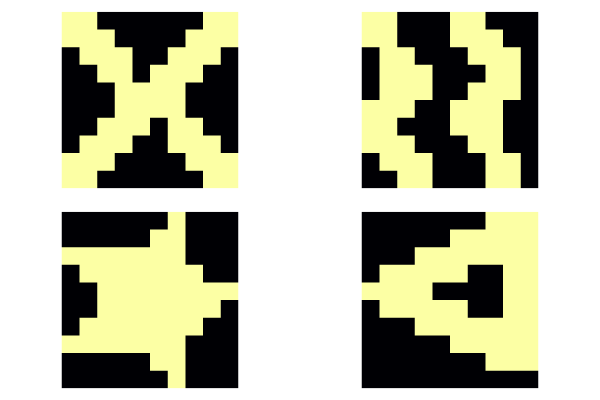

In [4]:
p=[heatmap(reshape(pat_i, 10, 10), aspect_ratio=1, ticks=false, showaxis=false) for pat_i=pat]
plot(p[1], p[2], p[3], p[4])

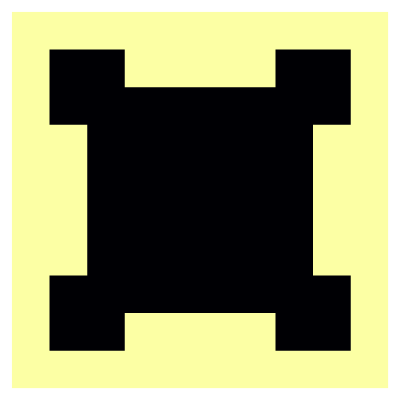

In [5]:
heatmap(reshape(A5, 10, 10), size=(400,400), ticks=false, showaxis=false)

In [6]:
# kf=0.2 # decay of feedback
# kr=0.9 # decay of refract.
# alpha=10 # refractory scaling


# parametry z pracy Hirata, Oku, Aihara, Chaos 22, 047511 (2012)
kf=0.8 # decay of feedback
kr=0.9 # decay of refract.
alpha=12 # refractory scaling

x=zeros(N)  # outputs
eta=zeros(N)  # feedback
zeta=zeros(N) # refractoriness
w=zeros(N,N);

In [7]:
# reguła Hebba

function set_w()
    global w
    m=size(pat)[1]
    for i=1:N
        for j=1:N
            s=0
            for p=1:m
                s+=pat[p][i]*pat[p][j]
            end
            w[i,j]=s/m
        end

    end
end

set_w()

In [8]:
function one_step()
    global x, w, zeta, eta, a
    zeta=kr.*zeta.-alpha.*x.+a
    eta=kf.*eta.+w*x
    x=f.(eta+zeta)
end

one_step (generic function with 1 method)

In [9]:
function overlap(x,pat)
   sum((2x.-1).*pat)/N
end

overlap (generic function with 1 method)

In [18]:
x=rand((0,1),N)
ov1, ov2, ov3, ov4 = [], [], [], []
a=6.4
# a=6.4 .+pat[1]
# a=6.4 .+A5

X=[]

for t in 1:1000
    one_step()
end
cols=10

N=1000

for t in 1:N
    one_step()
    
    push!(ov1,overlap(x,pat[1]))
    push!(ov2,overlap(x,pat[2]))
    push!(ov3,overlap(x,pat[3]))
    push!(ov4,overlap(x,pat[4]))
#     push!(X, x) # do gifów
end

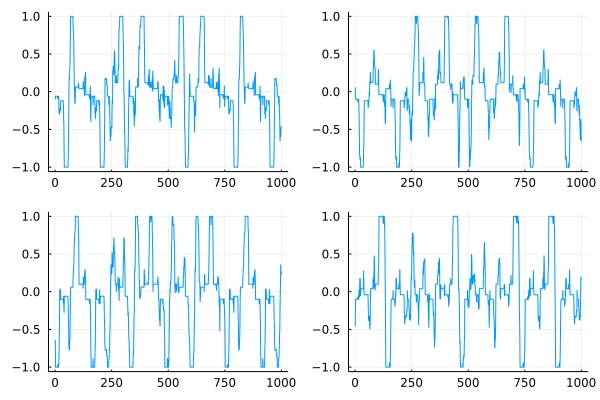

In [13]:
ov=[ov1,ov2,ov3,ov4]
plot(ov, layout=(2,2))

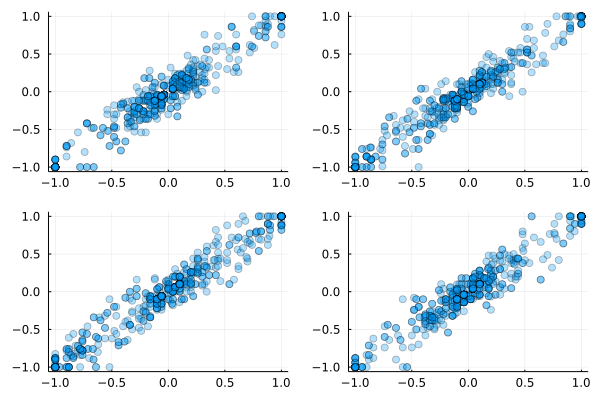

In [14]:
p=[scatter(o[1:end-1],o[2:end],alpha=0.3) for o=[ov1,ov2,ov3,ov4]]
plot(p[1], p[2], p[3], p[4])

In [19]:
for o in [ov1,ov2,ov3,ov4]
    println(sum(abs.(o))/N)
end

0.032802943828432414
0.028719854477881127
0.03806211715469664
0.03063571110003032


In [ ]:
anim = @animate for x in X
    heatmap(reshape(x, 10, 10), size=(400,400), ticks=false, showaxis=false)
end
gif(anim, "aihara5.gif", fps = 15)

## Brak pobudzenia
![](aihara.gif)

## Wzorzec 1 (X)
![](aihara1.gif)

## Wzorzec 2 (~)
![](aihara2.gif)

## Wzorzec 3 (*)
![](aihara3.gif)

## Wzorzec 4 ($\Delta$)
![](aihara4.gif)

## Wzorzec nieznany
![](aihara5.gif)

